Lossy conversion from int16 to uint8. Range [-16, 976]. Convert image to uint8 prior to saving to suppress this warning.


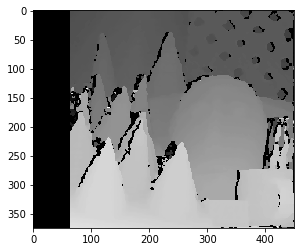

Lossy conversion from int16 to uint8. Range [-1024, 0]. Convert image to uint8 prior to saving to suppress this warning.


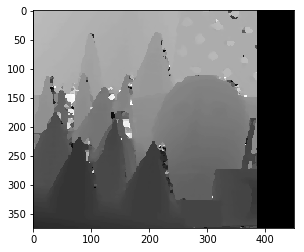

Lossy conversion from int16 to uint8. Range [-16, 1008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [-1024, 0]. Convert image to uint8 prior to saving to suppress this warning.


computing disparity...


'displ = np.int16(displ)\ndispr = np.int16(dispr)\n\nfilteredImg = wls_filter.filter(displ, imgL, None, dispr) \nfilteredImg1 = wls_filter.filter(dispr, imgR, None, displ)\n\n\n\nfilteredImg = cv2.normalize(src=filteredImg, dst=filteredImg, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX);\nfilteredImg = np.uint8(filteredImg)\nfilteredImg1 = cv2.normalize(src=filteredImg1, dst=filteredImg1, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX);\nfilteredImg1 = np.uint8(filteredImg1)\n\nimageio.imwrite("MapL.png",filteredImg)\nimageio.imwrite("MapR.png",filteredImg1)\ncv2.waitKey()\ncv2.destroyAllWindows()'

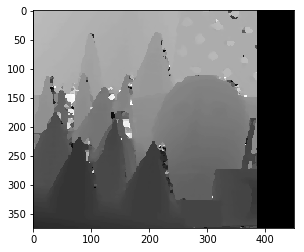

In [11]:
#Semi Global Block Matching technique

import numpy as np
from sklearn.preprocessing import normalize
import cv2
import matplotlib.pyplot as plt
import imageio
get_ipython().run_line_magic('matplotlib', 'inline')




imgL = cv2.imread('Images/cones/im2.png',0)
imgR = cv2.imread('Images/cones/im6.png',0)






window_size = 3 
 
left_matcher = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=64,             
    blockSize=5,
    P1=8 * 3 * window_size ** 2,    
    P2=32 * 3 * window_size ** 2,
    disp12MaxDiff=1,
    uniquenessRatio=15,
    speckleWindowSize=0,
    speckleRange=2,
    preFilterCap=63,
    mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
)
disparityL = left_matcher.compute(imgL,imgR)
plt.imshow(disparityL,'gray')
imageio.imwrite("MYLEFT IMAGE.png",disparityL)
plt.show()







right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)
disparity1 = right_matcher.compute(imgR,imgL)
plt.imshow(disparity1,'gray')
imageio.imwrite("MYRIGHT IMAGE.png",disparity1)
plt.show()





# FILTER Parameters
lmbda = 80000
sigma = 1.2
visual_multiplier = 1.0
 
wls_filter = cv2.ximgproc.createDisparityWLSFilter(left_matcher)
wls_filter.setLambda(lmbda)
wls_filter.setSigmaColor(sigma)





print('computing disparity...')
displ = left_matcher.compute(imgL, imgR)  
dispr = right_matcher.compute(imgR,imgL)
plt.imshow(displ,'gray')
imageio.imwrite("MYLEFT IMAGE2.png",displ)




plt.imshow(dispr,'gray')
imageio.imwrite("MYRIGHT IMAGE2.png",dispr)





